In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
# %matplotlib notebook

from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
# numpy built-in norm function

x = np.array([[3],[4]])

np.linalg.norm(x, 2)

5.0

In [3]:
x, y = np.array([[-2],[2]]), np.array([[4],[-3]])
x.T @ y

array([[-14]])

In [4]:
distance = np.linalg.norm(x-y,2)
distance

7.810249675906654

### Difference of squared distances. 
Determine whether the difference of the squared distancesto two fixed vectors c and d, defined as  

f(x)=∥x−c∥ −∥x−d∥ ,  

is linear, affine, or neither. If it is linear, give its inner product representation, i.e., an n-vector a for which f(x) = aTx for all x. If it is affine, give a and b for which f(x) = aT x + b holds for all x. If it is neither linear nor affine, give specific x, y, α, and β for which superposition fails, i.e.,
f(αx + βy) ̸= αf(x) + βf(y).  
(Provided α + β = 1, this shows the function is neither linear nor affine.)

In [45]:
# define c,d and x
c = np.array([[0],[2]])
d = np.array([[3],[6]])
x = np.array([[0],[2]])

In [46]:
# function which is difference of norm of (x-c)^2 and (x-d)^2

def fx(c,d, x):
    return (np.linalg.norm(x-c, 2)**2 - np.linalg.norm(x-d, 2)**2)

In [49]:
# The function works
fx(c,d, x)

-25.0

In [50]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
XX, YY = np.meshgrid(X, Y)
Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - (XX-d[0][0])**2 + (YY - d[1][0])**2)

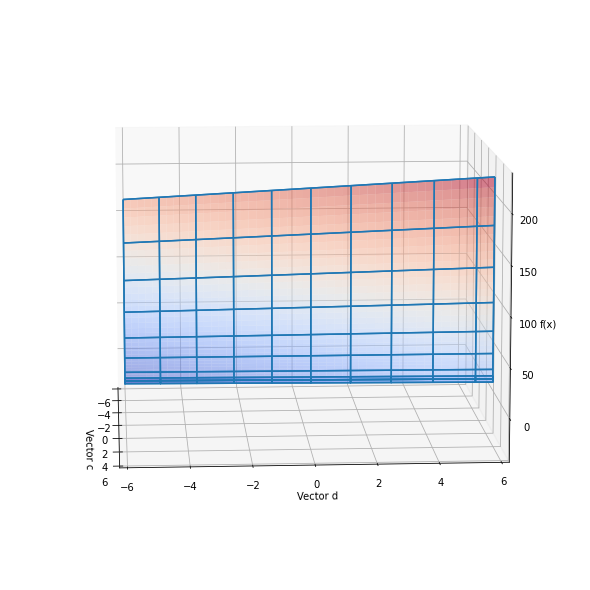

In [44]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-6,6)
plt.ylim(-6,6)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
#                        linewidth=0, antialiased=False)
ax.set_xlabel('Vector c')
ax.set_ylabel('Vector d')
ax.set_zlabel('f(x)')

def init():
    ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,
def animate(i):
    ax.view_init(elev=10, azim=3.6*i)
    return fig,
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
frames=100, interval=200, blit=True)    
HTML(ani.to_html5_video())

In [52]:
# Lets made norm(c) = norm(d)
c = np.array([[3],[4]])
d = np.array([[4],[3]])
x = np.array([[0],[2]])

In [58]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
XX, YY = np.meshgrid(X, Y)
Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - (XX-d[0][0])**2 + (YY - d[1][0])**2)

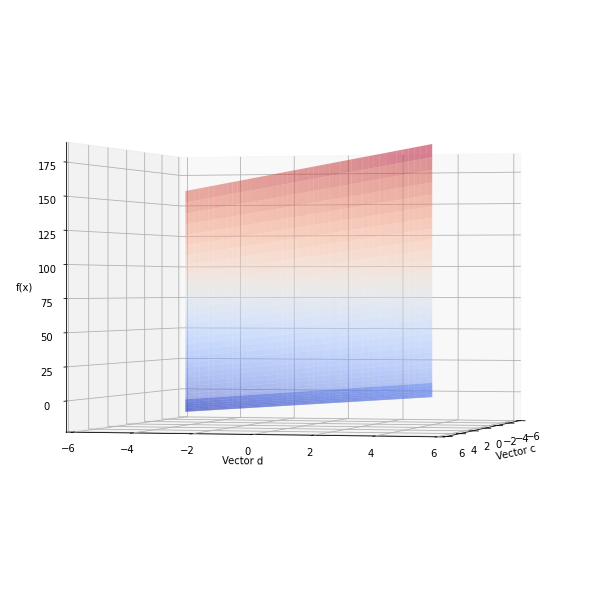

In [71]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-6,6)
plt.ylim(-6,6)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
#                        linewidth=0, antialiased=False)
ax.set_xlabel('Vector c')
ax.set_ylabel('Vector d')
ax.set_zlabel('f(x)')

ax.view_init(elev=0, azim=15)